# Qualitative Analysis 1

In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, HTML, Markdown
from lr.text_processing.util import pre_process_nli_df
from collections import Counter
from lr.stats.h_testing import get_paired_t_statistic

## When $\rho=0$ which test examples are affected by the transformation?

In [2]:
m_name = "roberta_large"
data = "snli"
batch = 1
path = "raw_results/{}/{}/syn_p_h/batch{}/rho_0p00_results.csv".format(data, m_name, batch)
df = pd.read_csv(path)

snli_trans = pd.read_csv("data/{}/test_p_h_syn_noun.csv".format(data))
sin_noun = pd.read_csv("data/{}/syn_noun.csv".format(data))
key2id = {k:i for k,i in zip(sin_noun.key,sin_noun.index)}
f = lambda k: key2id[k]

In [3]:
def filter_df_by_label(df, drop_label='-'):
    """
    drop observations with label 'drop_label'
    """
    return df.loc[df.label != drop_label]

In [4]:
snli_ori = pd.read_csv("data/{}/test.csv".format(data))
snli_ori = filter_df_by_label(snli_ori)
pre_process_nli_df(snli_ori)
snli_ori = snli_ori.reset_index(drop=True)

In [5]:
t = get_paired_t_statistic(df)
t

(14.545315428857133, 0.03817182410423453, 9824, 0.2601141314038052)

n = 200 | e_n = 9.6%
0.7696078431372549 [ 0.6735755640052629 , 0.865640122269247 ]


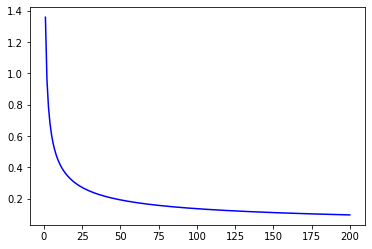

In [7]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

ids = df.loc[(df.A==1) & (df.B==0)]
ids = ids.index.tolist()

b = [44, 32, 80, 308,
     331, 463, 574,
     594, 677, 712, 877,
     910, 946, 982, 983, 1233, 1246,
     1270, 1321, 1353, 1389, 1402,
     1500, 1703, 1766, 1920, 2015,
     2209, 2240, 2375, 2380, 2446,
     2477, 2683, 2695, 2738, 2911, 3034,
     3092, 3279, 3332, 3388, 3470, 3555,
     3559, 3650, 3764]

b_to_print = [677, 982, 1312, 1353, 2015, 2240, 2446] 
g = [i for i in ids[:ids.index(3764)] if i not in b]
g_to_print = [1613, 1827, 2058, 1784, 2412, 1613]

end_ = ids[:ids.index(3764)]

more = ids[ids.index(3764):]

gn = len(g)
bn = len(b)
pct = gn/(gn+bn)

n = gn+bn 
n = 200


e95 = lambda n: e(0.05, n)
x = np.array(range(1,n+1))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e_id = eps[n]


print("n = {} | e_n = {:.1%}".format(x[n], e_id))


print(pct,"[",pct-e_id,",", pct+e_id, "]")

In [9]:
ids = df.loc[(df.A==1) & (df.B==0)]
ids = ids.index.tolist()
n = len(ids)
pct = n/df.shape[0]
display(Markdown(r"### When $\rho=0.0$, the number of disrupted sentences (1 to 0) is {} ({:.1%} of the test data)".format(n,pct)))
comb = pd.concat([snli_ori, snli_trans.add_suffix("_2")],1)
comb = comb.loc[more] 
display(HTML(comb.head(3).to_html()))

### When $\rho=0.0$, the number of disrupted sentences (1 to 0) is 527 (5.4% of the test data)

,premise,hypothesis,label,premise_2,hypothesis_2,label_2
3764,men play hockey,men play fair,neutral,men play field hockey,men play carnival,neutral
3825,a woman in a green shirt is working within a large amount of vegetation that is at different stages of maturity,she intends to pick the ripe vegetables and leave the unripened to ripen,neutral,a adult female in a green shirt is working within a large sum of flora that is at different stages of maturity,she intends to selection the mature vegetables and leave of absence the unripened to ripen,neutral
3838,a ballerina striking a pose in the studio,the ballerina is outdoors,contradiction,a danseuse striking a pose in the studio,the danseuse is open,contradiction


In [12]:
print(g)

[3, 31, 46, 60, 113, 123, 140, 323, 379, 391, 393, 395, 441, 499, 555, 556, 557, 630, 705, 722, 727, 756, 768, 776, 820, 821, 822, 849, 884, 916, 938, 953, 988, 995, 1050, 1057, 1062, 1067, 1088, 1090, 1093, 1141, 1162, 1173, 1206, 1228, 1296, 1368, 1377, 1383, 1386, 1431, 1472, 1480, 1505, 1516, 1517, 1525, 1534, 1567, 1609, 1613, 1623, 1663, 1683, 1727, 1771, 1784, 1788, 1790, 1796, 1806, 1820, 1827, 1859, 1891, 1894, 1909, 1934, 1945, 1950, 1988, 2025, 2040, 2058, 2065, 2080, 2097, 2123, 2162, 2167, 2180, 2195, 2242, 2271, 2288, 2313, 2333, 2365, 2366, 2407, 2412, 2425, 2435, 2447, 2448, 2471, 2490, 2497, 2516, 2558, 2569, 2571, 2591, 2668, 2700, 2765, 2766, 2791, 2809, 2825, 2886, 2929, 2948, 2962, 2998, 3016, 3056, 3074, 3078, 3175, 3176, 3195, 3210, 3215, 3234, 3239, 3326, 3367, 3369, 3381, 3413, 3476, 3478, 3491, 3513, 3554, 3578, 3579, 3602, 3635, 3692, 3703, 3705, 3709, 3728, 3737]


In [13]:
print(b)

[44, 32, 80, 308, 331, 463, 574, 594, 677, 712, 877, 910, 946, 982, 983, 1233, 1246, 1270, 1321, 1353, 1389, 1402, 1500, 1703, 1766, 1920, 2015, 2209, 2240, 2375, 2380, 2446, 2477, 2683, 2695, 2738, 2911, 3034, 3092, 3279, 3332, 3388, 3470, 3555, 3559, 3650, 3764]


## What are the most commom transformations that appear on the error pairs?

In [14]:
spaces = re.compile(' +')
results = []

ids = comb.index.tolist()
for id_ in ids:
    s = comb.loc[id_].premise + " " + comb.loc[id_].hypothesis
    st = comb.loc[id_].premise_2 + " " + comb.loc[id_].hypothesis_2
    s = spaces.sub(" ",s)
    st = spaces.sub(" ",st)
    s = s.strip()
    st = st.strip()
    s = set(s.split(" "))
    st = set(st.split(" "))
    diff = list(s - st)
    try:
        diff = list(map(f, diff))
        results += diff
    except KeyError:
        print(id_)
        print(s)
        print(st)
    
    
    
results_c = Counter(results)
dict_id = [i[0] for i in results_c.most_common(10)]
sin_noun.loc[:, "freq"] = [results_c[i]/len(results) for i in sin_noun.index]
sin_noun = sin_noun.sort_values("freq", ascending=False)
sin_noun.loc[:, "freq"] = sin_noun.freq.map(lambda x: "{:.1%}".format(x))
sin_noun.head(10)

,key,value,freq
3353,man,adult male,10.2%
6169,woman,adult female,5.6%
637,boy,male child,3.0%
503,bicycle,bike,2.0%
4022,person,individual,1.7%
3814,outdoors,open,1.3%
511,bike,motorcycle,1.3%
5121,snow,snowfall,1.3%
4663,road,route,1.1%
2825,human,man,1.0%
